In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!conda install -y gdown

Retrieving notices: ...working... done
done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.3.0



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - gdown


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    filelock-3.13.3            |     pyhd8ed1ab_0          15 KB  conda-forge
    gdown-5.1.0                |     pyhd8ed1ab_0          21 KB  conda-forge
    openssl-3.2.1              |       hd590300_1         2.7 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.8 MB

The following NEW packages will be 

In [3]:
# https://drive.google.com/file/d/14V6xb_wv9F2Nm4XSqQxCuZtDdmYT_Cge/view?usp=sharing
# https://drive.google.com/file/d/19juGcxAusUpX4Z62stexNLovoNrCWrb2/view?usp=sharing
# !gdown --id 14V6xb_wv9F2Nm4XSqQxCuZtDdmYT_Cge
!gdown --id 19juGcxAusUpX4Z62stexNLovoNrCWrb2

/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=19juGcxAusUpX4Z62stexNLovoNrCWrb2
From (redirected): https://drive.google.com/uc?id=19juGcxAusUpX4Z62stexNLovoNrCWrb2&confirm=t&uuid=a86c4ede-2c10-4eb7-88c3-71a062d9c93a
To: /kaggle/working/TomatoDataset.zip
100%|████████████████████████████████████████| 274M/274M [00:04<00:00, 63.0MB/s]


In [4]:
# unzipping the folder , the contents are placed in Data->output->/kaggle/working 
# Currently each user is limited to 20GB data in kaggle 
!unzip TomatoDataset.zip

Archive:  TomatoDataset.zip
   creating: TomatoDataset/test/
   creating: TomatoDataset/test/Tomato___Bacterial_spot/
  inflating: TomatoDataset/test/Tomato___Bacterial_spot/0045ba29-ed1b-43b4-afde-719cc7adefdb___GCREC_Bact.Sp 6254.JPG  
  inflating: TomatoDataset/test/Tomato___Bacterial_spot/00639d29-2d1a-4fcf-9bd3-a2b3109c74c4___UF.GRC_BS_Lab Leaf 1054.JPG  
  inflating: TomatoDataset/test/Tomato___Bacterial_spot/00b7e89a-e129-4576-b51f-48923888bff9___GCREC_Bact.Sp 6202.JPG  
  inflating: TomatoDataset/test/Tomato___Bacterial_spot/014b58ae-091b-408a-ab4a-5a780cd1c3f3___GCREC_Bact.Sp 2971.JPG  
  inflating: TomatoDataset/test/Tomato___Bacterial_spot/01a3cf3f-94c1-44d5-8972-8c509d62558e___GCREC_Bact.Sp 3396.JPG  
  inflating: TomatoDataset/test/Tomato___Bacterial_spot/022e8a4a-9297-4de3-88a5-ee7aa46dd526___UF.GRC_BS_Lab Leaf 8682.JPG  
  inflating: TomatoDataset/test/Tomato___Bacterial_spot/030501db-683b-4ed5-9ec0-c475a5dfdd76___GCREC_Bact.Sp 5650.JPG  
  inflating: TomatoDataset/test/

In [5]:
# # remove folder from current working directory kaggle
# ! rm -rf folder_val

# # remove files from current working directory kaggle
# ! rm folder.zip

In [6]:
import os  # Operating system interfaces
import tensorflow as tf                                    # TensorFlow deep learning framework
import matplotlib.pyplot as plt                            # Plotting library
import matplotlib.image as mpimg                           # Image loading and manipulation library
from tensorflow.keras.models import Sequential, Model      # Sequential and Functional API for building models
from tensorflow.keras.optimizers import Adam               # Adam optimizer for model training
from tensorflow.keras.callbacks import EarlyStopping       # Early stopping callback for model training
from tensorflow.keras.regularizers import l1, l2   # L1 and L2 regularization for model regularization
from tensorflow.keras.models import Model,Sequential, load_model
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data augmentation and preprocessing for images
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, BatchNormalization
# Various types of layers for building neural networks
from tensorflow.keras.applications import DenseNet121, EfficientNetB4, Xception, VGG16, VGG19   # Pre-trained models for transfer learning

2024-04-04 15:49:40.199416: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-04 15:49:40.199514: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-04 15:49:40.332349: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [7]:
# import os
# os.environ['XLA_FLAGS'] = '--xla_disable_jit'

# import tensorflow as tf
# print(tf.__version__)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the preprocessing pipeline
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

# Generate augmented versions of the dataset
train_generator = datagen.flow_from_directory(
    '/kaggle/working/TomatoDataset/train',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

validation_generator = datagen.flow_from_directory(
    '/kaggle/working/TomatoDataset/test',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

Found 11298 images belonging to 10 classes.
Found 4839 images belonging to 10 classes.


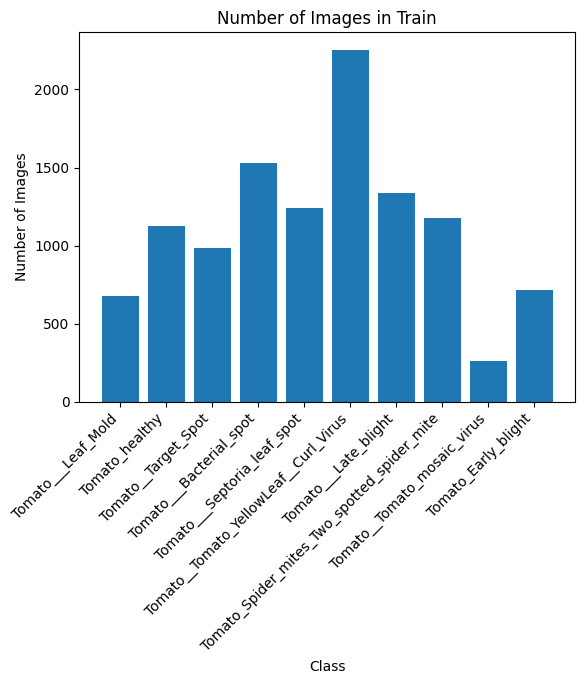

In [9]:
import os
import matplotlib.pyplot as plt

# Directory where the images are stored
img_dir = '/kaggle/working/TomatoDataset/train'

# Get a list of all the subdirectories (which correspond to the classes)
class_dirs = [d for d in os.listdir(img_dir) if os.path.isdir(os.path.join(img_dir, d))]

# Create a list to store the number of images in each class
class_counts = []

# Iterate over each class directory
for class_dir in class_dirs:
    # Get the path to the class directory
    class_path = os.path.join(img_dir, class_dir)
    
    # Get a list of all the image files in the class directory
    img_files = [f for f in os.listdir(class_path)]
    
    # Add the number of images to the class_counts list
    class_counts.append(len(img_files))

# Plot the class counts
plt.bar(class_dirs, class_counts)
plt.xlabel('Class')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Images')
plt.title('Number of Images in Train')
plt.show()

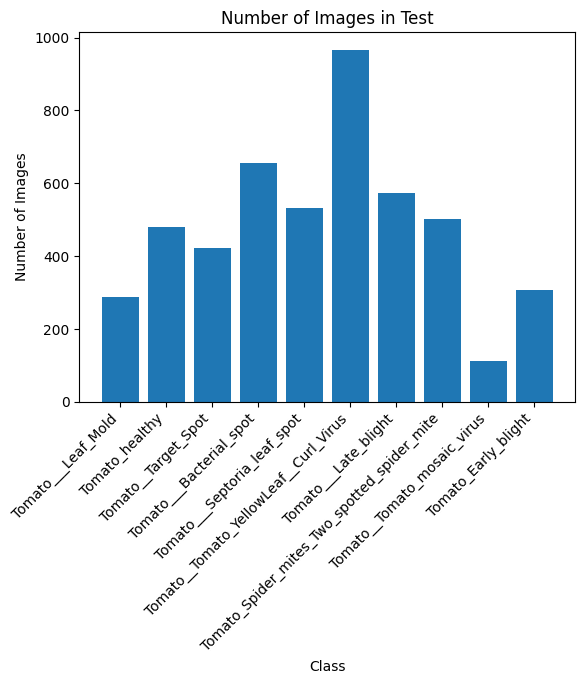

In [10]:
import os
import matplotlib.pyplot as plt

# Directory where the images are stored
img_dir = '/kaggle/working/TomatoDataset/test'

# Get a list of all the subdirectories (which correspond to the classes)
class_dirs = [d for d in os.listdir(img_dir) if os.path.isdir(os.path.join(img_dir, d))]

# Create a list to store the number of images in each class
class_counts = []

# Iterate over each class directory
for class_dir in class_dirs:
    # Get the path to the class directory
    class_path = os.path.join(img_dir, class_dir)
    
    # Get a list of all the image files in the class directory
    img_files = [f for f in os.listdir(class_path)]
    
    # Add the number of images to the class_counts list
    class_counts.append(len(img_files))

# Plot the class counts
plt.bar(class_dirs, class_counts)
plt.xlabel('Class')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Images')
plt.title('Number of Images in Test')
plt.show()

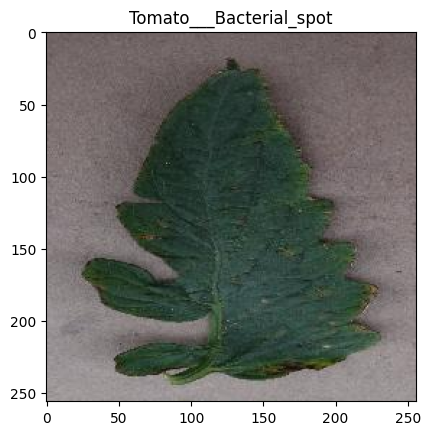

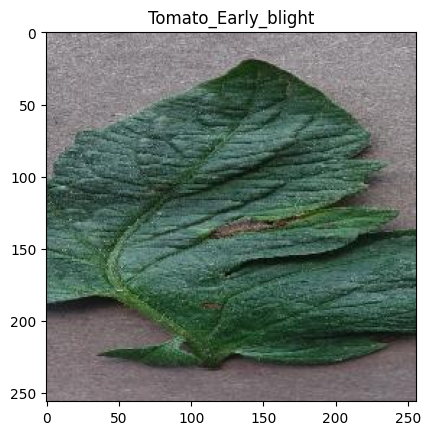

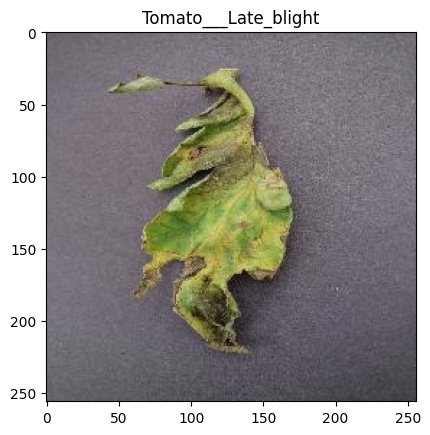

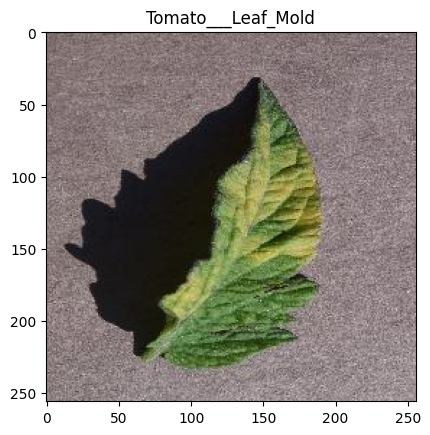

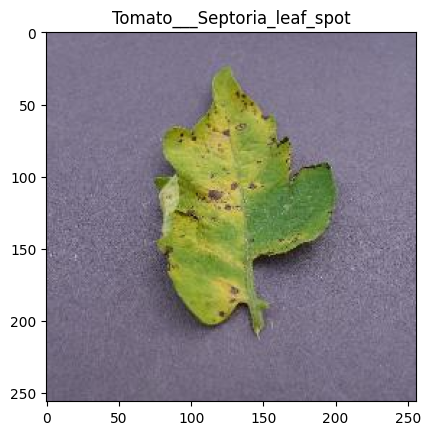

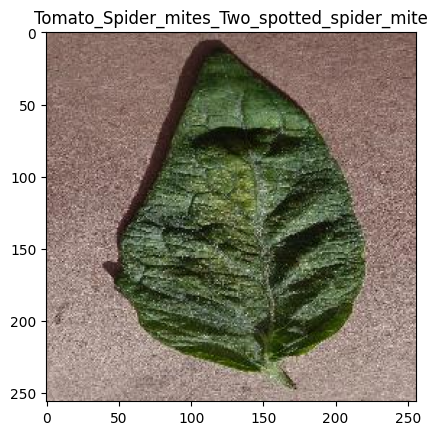

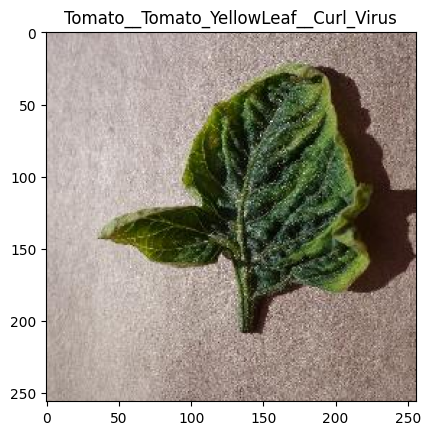

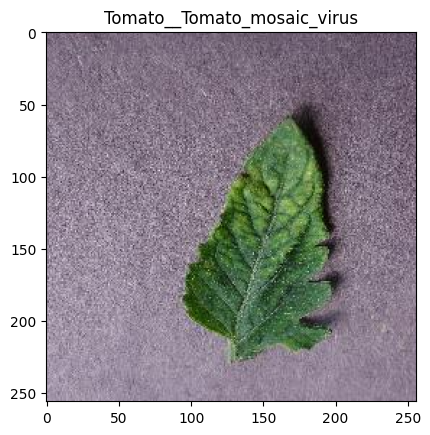

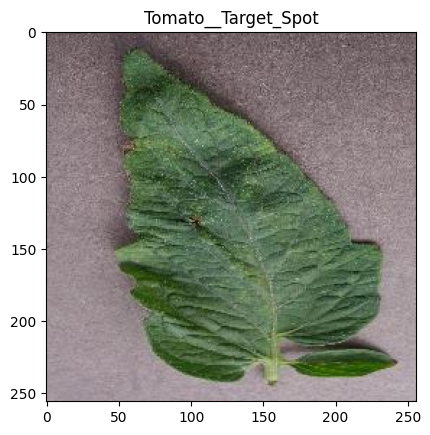

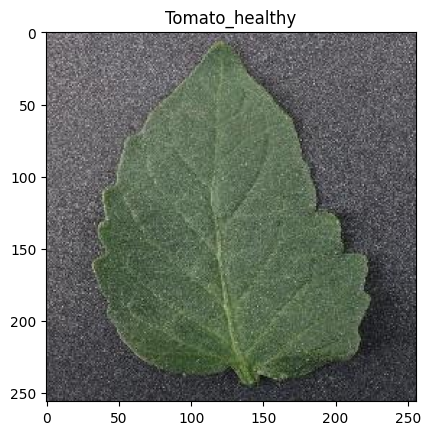

In [11]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the dataset directory
dataset_dir = '/kaggle/working/TomatoDataset/train'

# Define the classes in the dataset
classes = ['Tomato___Bacterial_spot', 'Tomato_Early_blight', 'Tomato___Late_blight',
           'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot',
           'Tomato_Spider_mites_Two_spotted_spider_mite',
           'Tomato__Tomato_YellowLeaf__Curl_Virus',
           'Tomato__Tomato_mosaic_virus', 'Tomato__Target_Spot', 'Tomato_healthy']

# Define the number of images to display for each class
num_images = 1

# Loop through each class
for class_ in classes:
    # Define the class directory
    class_dir = os.path.join(dataset_dir, class_)
    
    # Loop through each image in the class directory
    for i, filename in enumerate(os.listdir(class_dir)[:num_images]):
        # Construct the full path to the image file
        img_path = os.path.join(class_dir, filename)
        
        # Display the image
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.title(class_)
        plt.show()

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, GlobalAveragePooling2D
from keras.applications import DenseNet201, DenseNet121

from tensorflow.keras import layers, Model, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D

def build_densenet():
    densenet = DenseNet201(weights='imagenet', include_top=False)

    input = Input(shape=(224,224,3))
    x = Conv2D(3, (3, 3), padding='same')(input)

    x = densenet(x)

    # Add a global average pooling layer
    x = GlobalAveragePooling2D()(x)

#     # Add batch normalization and dropout layers
#     x = BatchNormalization()(x)
#     x = Dropout(0.5)(x)

    # Add dense layers with 1024, 512, and 128 units and ReLU activation
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)

    # Multi-output layer
    output = Dense(10, activation='softmax', name='root')(x)

    # Create the model
    model = Model(input, output)

#     # Compile the model
#     optimizer = Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.1)
#     model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

#     model.summary()

    return model

In [13]:
model = build_densenet()

model.summary()

74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 3)    │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densenet201 (Functional)        │ (None, 7, 7, 1920)     │    18,321,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1920)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     1,967,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ root (Dense)                    │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,880,926 (79.65 MB)

 Trainable params: 20,651,870 (78.78 MB)

 Non-trainable params: 229,056 (894.75 KB)

In [14]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
from keras.callbacks import ModelCheckpoint

# Define the callback to save the best model based on validation accuracy
checkpoint_filepath = '/kaggle/working/best_model.weights.h5'
checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=True, monitor='val_accuracy', 
                             verbose=1, save_best_only=True, mode='max')

In [16]:
# Train the model
# history = model.fit(train_generator, epochs=10, validation_data=validation_generator, callbacks=[EarlyStopping(patience=0)])
history = model.fit(train_generator, epochs=75, validation_data=validation_generator, 
                    callbacks=[checkpoint]) # 75 epochs

Epoch 1/75


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-04-04 15:56:03.076965: E external/local_xla/xla/service/slow_operation_alarm.cc:65] 
********************************
[Compiling module a_inference_one_step_on_data_128638__.90734] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2024-04-04 15:56:05.710147: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2m2.633355019s

********************************
[Compiling module a_inference_one_step_on_data_128638__.90734] Very slow compile? If you want to file a bug, run with envvar XLA_FLA

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6281 - loss: 1.1416

W0000 00:00:1712246522.975118    5373 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_accuracy improved from -inf to 0.32651, saving model to /kaggle/working/best_model.weights.h5
177/177 ━━━━━━━━━━━━━━━━━━━━ 799s 2s/step - accuracy: 0.6287 - loss: 1.1397 - val_accuracy: 0.3265 - val_loss: 12.3824
Epoch 2/75
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 671ms/step - accuracy: 0.8614 - loss: 0.4322
Epoch 2: val_accuracy improved from 0.32651 to 0.63753, saving model to /kaggle/working/best_model.weights.h5
177/177 ━━━━━━━━━━━━━━━━━━━━ 175s 964ms/step - accuracy: 0.8615 - loss: 0.4319 - val_accuracy: 0.6375 - val_loss: 3.1273
Epoch 3/75
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 666ms/step - accuracy: 0.9145 - loss: 0.2837
Epoch 3: val_accuracy improved from 0.63753 to 0.82352, saving model to /kaggle/working/best_model.weights.h5
177/177 ━━━━━━━━━━━━━━━━━━━━ 174s 958ms/step - accuracy: 0.9145 - loss: 0.2836 - val_accuracy: 0.8235 - val_loss: 0.7741
Epoch 4/75
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 673ms/step - accuracy: 0.9408 - loss: 0.2023
Epoch 4: val_accuracy improved from 0.82352 to 

In [17]:
# model.save('/kaggle/working/my_model.keras')

In [18]:
# new_model = tf.keras.models.load_model('/kaggle/working/my_model.keras')

In [19]:
new_model = build_densenet()
new_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 3)    │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densenet201 (Functional)        │ (None, 7, 7, 1920)     │    18,321,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1920)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │     1,967,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ root (Dense)                    │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,880,926 (79.65 MB)

 Trainable params: 20,651,870 (78.78 MB)

 Non-trainable params: 229,056 (894.75 KB)

In [20]:
from keras.models import load_model

new_model.load_weights(checkpoint_filepath)

In [21]:
final_loss, final_accuracy = model.evaluate(validation_generator)
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))

76/76 ━━━━━━━━━━━━━━━━━━━━ 52s 679ms/step - accuracy: 0.9479 - loss: 0.2983
Final Loss: 0.25791534781455994, Final Accuracy: 0.9481297731399536


In [22]:
# Extract true labels for validation data
y_val_true = []
for i in range(len(validation_generator)):
    y_val_true.extend(np.argmax(validation_generator[i][1], axis=1))

# # Print true labels
# print("True Labels:")
# print(y_true)

y_train_true = []
for i in range(len(train_generator)):
    y_train_true.extend(np.argmax(train_generator[i][1], axis=1))

In [23]:
from sklearn.metrics import classification_report

# Assuming model.predict(validation_generator) gives the predicted labels
# y_true = validation_generator.classes
y_val_pred = new_model.predict(validation_generator).argmax(axis=1)

# # Print y_true and y_pred
# print("True Labels:")
# print(y_true)
# print("\nPredicted Labels:")
# print(y_pred)

# Generate classification report
class_report_test = classification_report(y_val_true, y_val_pred)

# Print the report
print("\nClassification Report:")
print(class_report_test)

with open('/kaggle/working/classification_report_test.txt', 'w') as file:
    file.write(class_report_test)

 2/76 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step  

W0000 00:00:1712259669.968306    5373 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


76/76 ━━━━━━━━━━━━━━━━━━━━ 87s 902ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       306
           1       0.99      0.99      0.99       503
           2       0.99      0.98      0.99       422
           3       0.99      1.00      1.00       966
           4       0.99      1.00      1.00       112
           5       1.00      0.97      0.98       656
           6       0.98      1.00      0.99       573
           7       0.97      1.00      0.98       289
           8       0.99      0.98      0.99       532
           9       1.00      1.00      1.00       480

    accuracy                           0.99      4839
   macro avg       0.99      0.99      0.99      4839
weighted avg       0.99      0.99      0.99      4839



In [24]:
# print(y_val_true, y_val_pred)

In [25]:
from sklearn.metrics import classification_report

# Assuming model.predict(validation_generator) gives the predicted labels
# y_true = train_generator.classes
y_train_pred = new_model.predict(train_generator).argmax(axis=1)

# Print y_true and y_pred
print("True Labels:")
print(y_train_true)
print("\nPredicted Labels:")
print(y_train_pred)

# Generate classification report
class_report_train = classification_report(y_train_true, y_train_pred)

# Print the report
print("\nClassification Report:")
print(class_report_train)

with open('/kaggle/working/classification_report_train.txt', 'w') as file:
    file.write(class_report_train)

177/177 ━━━━━━━━━━━━━━━━━━━━ 130s 732ms/step
True Labels:
[6, 6, 8, 4, 7, 7, 1, 6, 8, 1, 0, 2, 9, 6, 6, 5, 3, 5, 1, 9, 1, 5, 5, 1, 3, 6, 0, 8, 8, 7, 9, 3, 3, 9, 1, 5, 8, 0, 9, 3, 2, 3, 4, 8, 6, 3, 3, 9, 0, 2, 1, 5, 3, 9, 3, 1, 8, 8, 9, 8, 3, 5, 8, 5, 5, 1, 8, 0, 3, 5, 5, 3, 5, 9, 3, 4, 3, 3, 3, 5, 3, 8, 1, 3, 0, 9, 4, 7, 3, 7, 1, 0, 6, 9, 6, 3, 0, 3, 3, 3, 8, 8, 8, 5, 3, 3, 3, 5, 6, 7, 3, 3, 5, 3, 5, 9, 0, 1, 4, 3, 2, 3, 9, 3, 3, 8, 7, 2, 7, 5, 6, 3, 3, 5, 3, 3, 5, 5, 3, 8, 2, 8, 1, 5, 6, 9, 4, 3, 9, 1, 0, 3, 3, 5, 3, 1, 9, 6, 1, 3, 1, 8, 2, 9, 7, 9, 6, 3, 2, 5, 5, 5, 6, 1, 7, 5, 5, 9, 5, 2, 4, 2, 6, 0, 6, 3, 3, 5, 8, 1, 6, 6, 7, 5, 5, 8, 0, 7, 4, 5, 3, 5, 5, 1, 6, 7, 6, 1, 6, 3, 7, 6, 0, 6, 8, 5, 1, 1, 9, 8, 8, 0, 7, 8, 2, 9, 3, 6, 5, 3, 1, 2, 3, 8, 8, 8, 1, 6, 3, 9, 2, 5, 8, 0, 3, 3, 3, 1, 2, 5, 6, 3, 5, 8, 6, 7, 3, 0, 5, 7, 9, 3, 5, 3, 3, 6, 1, 7, 3, 3, 6, 3, 8, 7, 0, 7, 9, 8, 3, 5, 4, 3, 4, 5, 6, 0, 9, 0, 2, 6, 6, 2, 9, 2, 3, 2, 1, 2, 1, 3, 5, 9, 7, 8, 8, 7, 6, 5, 1, 3, 2, 1, 3, 3,

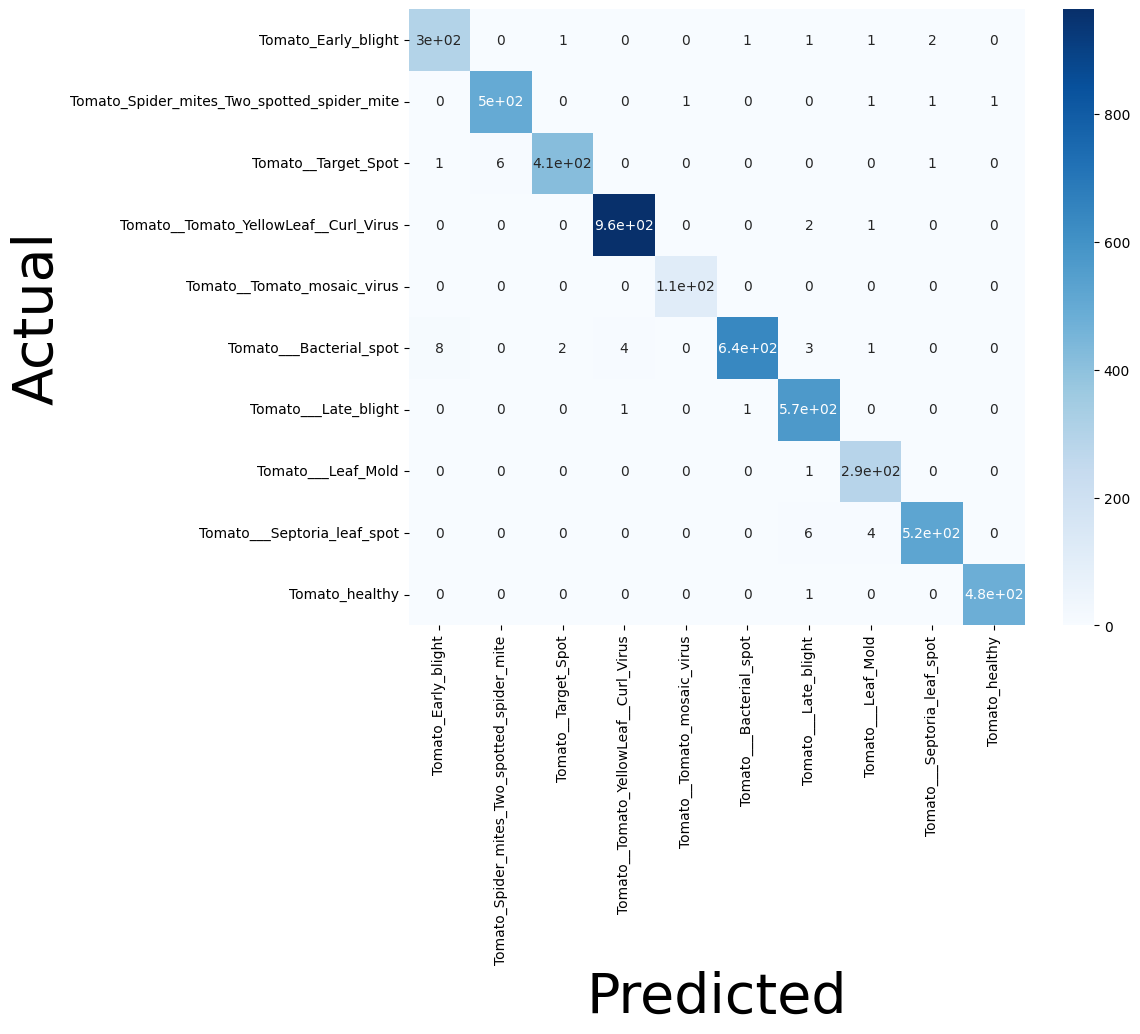

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val_true, y_val_pred)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, square=True, xticklabels=validation_generator.class_indices.keys(), 
            yticklabels=validation_generator.class_indices.keys())
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

plt.savefig('/kaggle/working/confusion_matrix_blue.png')

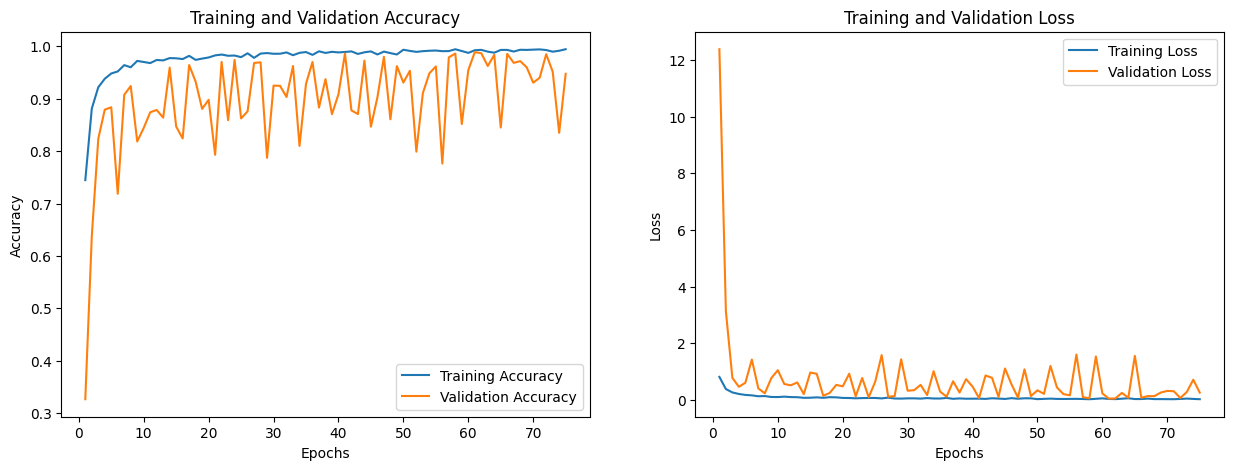

In [27]:
# history is model.fit , didnot store actually (here)
# Get the training and validation accuracy values from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get the training and validation loss values from the history object
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(acc) + 1)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the training and validation accuracy on the first subplot
ax1.plot(epochs, acc, label='Training Accuracy')
ax1.plot(epochs, val_acc, label='Validation Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot the training and validation loss on the second subplot
ax2.plot(epochs, loss, label='Training Loss')
ax2.plot(epochs, val_loss, label='Validation Loss')
ax2.set_title('Training and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

# Show the plot
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step
Predicted class: Tomato__Target_Spot
Root Cause: Fungal infection caused by Corynespora cassiicola
Fertilizer recommendation: Use a fertilizer with a high phosphorus content.


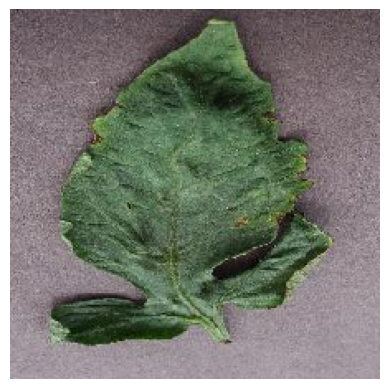

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Define the list of disease classes
disease_class = ['Tomato_Early_blight', 'Tomato_Spider_mites_Two_spotted_spider_mite',
                 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus',
                 'Tomato__Tomato_mosaic_virus', 'Tomato_Bacterial_spot',
                 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot',
                 'Tomato_healthy']

# Load the image
image = tf.keras.preprocessing.image.load_img(
    # '/content/drive/MyDrive/Major Project/TomatoDataset/early_blight21-150x150.jpg', # - late blight(same)
    # '/content/drive/MyDrive/Major Project/TomatoDataset/septoria spot leaf.jpeg', # - septoria(same)
    # '/content/drive/MyDrive/Major Project/TomatoDataset/healthyy.jpeg', # - septoria(same)
    # '/content/drive/MyDrive/Major Project/TomatoDataset/bacterial spot.jpg', # - leaf mold(same)
    # '/content/drive/MyDrive/Major Project/TomatoDataset/healthy leaf da.jpeg', # - lateblight(same)
#     '/content/drive/MyDrive/Major Project/TomatoDataset/late_blight1-300x219.jpg', # - late blight(same)
#     '/kaggle/working/TomatoDataset/test/Tomato___Septoria_leaf_spot/edab479f-7af4-45ee-ac67-a5874a58ef52___Matt.S_CG 6803.JPG', #- septoria
#     '/kaggle/working/TomatoDataset/test/Tomato___Late_blight/eda41abe-61cf-439d-9562-e03fee3cd2ca___GHLB2 Leaf 8802.JPG', # - lateblight
#     '/kaggle/working/TomatoDataset/test/Tomato_Spider_mites_Two_spotted_spider_mite/f640c64b-1ab5-4c75-8b30-0d05834ad11b___Com.G_SpM_FL 1610.JPG', # - same 
#     '/kaggle/working/TomatoDataset/test/Tomato___Leaf_Mold/0de02a32-f166-4d67-bbb8-689e96d04c44___Crnl_L.Mold 8811.JPG', # - same
#     '/kaggle/working/TomatoDataset/test/Tomato__Tomato_YellowLeaf__Curl_Virus/15cddf07-9796-455e-9ded-a84655b9828e___UF.GRC_YLCV_Lab 02296.JPG', #- same
#     '/kaggle/working/TomatoDataset/test/Tomato__Tomato_mosaic_virus/a3f05d12-0e65-4f04-8f7d-5299124eb392___PSU_CG 2204.JPG', # - late blight ; 99.2 val_acc # - mosaicvirus
#     '/kaggle/working/TomatoDataset/test/Tomato__Tomato_mosaic_virus/1b9dc07a-40ab-45bc-a873-1ad4212e35a3___PSU_CG 2289.JPG', #- spidermites ; 99.2 val_acc # - mosaicvirus
#     '/kaggle/working/TomatoDataset/test/Tomato__Tomato_mosaic_virus/3ecbb7b8-ad66-4944-886e-de2ae2c2c35e___PSU_CG 2095.JPG', # - spidermites; 99.2 val_acc # - mosaicvirus
#     '/kaggle/working/TomatoDataset/test/Tomato_healthy/d835fbab-7301-4544-aba9-37cb5d25de9f___RS_HL 0506.JPG', # - same
#     '/kaggle/working/TomatoDataset/test/Tomato_healthy/cc289e5c-7899-4081-9ea9-c3dc3ad3d2d4___GH_HL Leaf 408.1.JPG', # - same
#     '/kaggle/working/TomatoDataset/train/Tomato__Tomato_mosaic_virus/0a7cc59f-b2b0-4201-9c4a-d91eca5c03a3___PSU_CG 2230.JPG', # - spidermites
    '/kaggle/working/TomatoDataset/test/Tomato__Target_Spot/03e3b044-d81f-49ca-a4d3-c6f7173b55a9___Com.G_TgS_FL 9921.JPG', # - same
#     '/kaggle/working/TomatoDataset/test/Tomato___Bacterial_spot/cb4644f6-9f79-4cad-96e8-08da62d43550___GCREC_Bact.Sp 5732.JPG', # - same
#     '/kaggle/working/TomatoDataset/test/Tomato_Early_blight/21ffaf6b-7ad0-45bf-bd7e-7d697413ebbd___RS_Erly.B 9500.JPG', # - same
    target_size=(224, 224)
)

# Preprocess the image
image = tf.keras.preprocessing.image.img_to_array(image)
image = image / 255.0

# Make a prediction
prediction = model.predict(tf.expand_dims(image, axis=0))

# Get the predicted class index
predicted_class_index = np.argmax(prediction)

# Print the predicted class nameimport matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Define the list of disease classes
disease_class = ['Tomato_Early_blight', 'Tomato_Spider_mites_Two_spotted_spider_mite',
                 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus',
                 'Tomato__Tomato_mosaic_virus', 'Tomato_Bacterial_spot',
                 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot',
                 'Tomato_healthy']

# Load the image


# Preprocess the image

# Make a prediction


# Get the predicted class index


# Print the predicted class name
predicted_class = disease_class[predicted_class_index]
print("Predicted class:", predicted_class)



# Fertilizer recommendation dictionary
fertilizer_recommendation = {
    'Tomato_Early_blight': 'Use a balanced fertilizer with a ratio of 10-10-10.',
    'Tomato_Spider_mites_Two_spotted_spider_mite': 'Use a fertilizer with a high nitrogen content.',
    'Tomato__Target_Spot': 'Use a fertilizer with a high phosphorus content.',
    'Tomato__Tomato_YellowLeaf__Curl_Virus': 'Use a fertilizer with a high potassium content.',
    'Tomato__Tomato_mosaic_virus': 'Use a fertilizer with a high calcium content.',
    'Tomato_Bacterial_spot': 'Use a fertilizer with a high copper content.',
    'Tomato_Late_blight': 'Use a fertilizer with a high manganese content.',
    'Tomato_Leaf_Mold': 'Use a fertilizer with a high sulfur content.',
    'Tomato_Septoria_leaf_spot': 'Use a fertilizer with a high zinc content.',
    'Tomato_healthy': 'No fertilizer recommendation needed.'
}

root_cause = {
    'Tomato_Early_blight': 'Fungal infection caused by Alternaria solani fungus',
    'Tomato_Spider_mites_Two_spotted_spider_mite': 'Infestation by Tetranychus urticae, commonly known as two-spotted spider mites',
    'Tomato__Target_Spot': 'Fungal infection caused by Corynespora cassiicola',
    'Tomato_YellowLeaf_Curl_Virus': 'Viral infection caused by Tomato yellow leaf curl virus (TYLCV)',
    'Tomato_mosaic_virus': 'Viral infection caused by Tomato mosaic virus (ToMV)',  
    # 'Tomato_Bacterial_spot': 'Bacterial infection caused by Xanthomonas campestris bacteria',
    'Tomato_Bacterial_spot': 'Bacterial infection caused by Xanthomonas perforans or Xanthomonas gardneri or Xanthomonas campestris bacteria',
    'Tomato_Leaf_Mold': 'Fungal infection caused by Passalora fulva (formerly Fulvia fulva)',
    'Tomato_Late_blight': 'Fungal infection caused by Phytophthora infestans',
    'Tomato_Septoria_leaf_spot': 'Fungal infection caused by Septoria lycopersici',
    'Tomato_healthy': 'Healthy tomato plants without any visible diseases or pests',
}

predicted_root_cause = root_cause[predicted_class]

# Get the fertilizer recommendation for the predicted class
fertilizer_recommendation_predicted = fertilizer_recommendation[predicted_class]

# Print the Root cause and fertilizer recommendation
print("Root Cause:", predicted_root_cause)

print("Fertilizer recommendation:", fertilizer_recommendation_predicted)


# Show the image
plt.imshow(image)
plt.axis('off')
plt.show()